# Big Data and Data Analytics - Lab Project 3
This lab project covers the material from Lectures 1-7. Please make yourself familiar with the lecture content before proceeding. We will be using the [**Boston**](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) housing dataset courtesy of D. Harrison and D. L. Rubinfeld at the University of Toronto.

**<u>How to complete</u>**:
- For each exercise, read the objective and hint, and then fill the cells containing **TODO**. These will usually be code cells requiring you to write Python code. If we ask you to explain something in your own words, these may also be Markdown cells.
- Do not modify any cells except for the ones containing **TODO**.
- Do not add or delete any cells from the notebook. If you add any cells during your work, please remove them before submitting.
- Allowed libraries are imported below. No additional libraries may be used for this lab project.
- **Run all cells before submitting. You will only get marks for code that has been run, and has not produced any errors.**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

If there are any errors during the import above, you may need to install the allowed libraries.

## Exercise 1: Dataset Import and Preparation 

### Exercise 1.1 
- Load the dataset `Housing.csv` into a pandas `DataFrame` named `df_housing`.
- Investigate whether there are rows affected by missing values in `df_housing` and `print` your results to the console. If any rows are affected by missing values, remove these from `df_housing`.

Hint: Look at the functions [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), [`pd.isnull`](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html) and [`pd.DataFrame.any`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html).

In [6]:
# Load the dataset Housing.csv into a pandas DataFrame named df_housing.
df_housing = pd.read_csv("Housing.csv", na_values='?')
print(df_housing.isnull().values.any())


False


## Exercise 2: Regression 

### Exercise 2.1 
- Perform a multiple linear regression that regresses `MEDV` on `CRIM` (per capita crime rate by town), `RM` (average number of rooms per dwelling), `NOX` (nitric oxides concentration; parts per 10 million), `DIS` (weighted distances to five Boston employment centres), and `AGE` (proportion of owner- occupied units built prior to 1940). Save the model as `res_1`.
- `print` the results of the regression `res_1` to the console (including a regression table and reporting of F-values).
- Interpret the results of the regression `res_1` in your own words according to APA style. This includes which parts of the model are significant and what impact they have on `MEDV`.

Hint: Use [`statsmodels.formula.api.ols`](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html#statsmodels.formula.api.ols) to perform the regression. `statsmodels.formula.api` has been imported above as `smf`.

In [7]:
MOD_1 = smf.ols('MEDV ~ CRIM + RM + NOX + DIS + AGE', data=df_housing) # Define model
res_1 = MOD_1.fit() # Fit using OLS
print(res_1.summary()) # Print full summary


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     145.3
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           5.02e-95
Time:                        14:52:06   Log-Likelihood:                -1613.2
No. Observations:                 506   AIC:                             3238.
Df Residuals:                     500   BIC:                             3264.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.2273      4.015     -1.551      0.1

The regression results show a very interesting situation, with a non statistically significant Intercept p-value=0.122. In this case it makes sense, considering the housing dataset when all the predictor variables are equal to zero the MEDV (Median value of owner-occupied homes) would be negative and this is not possible. All predictor variables are statistically significant (F-statistic: 145.3, p-value<0.001). 

In this case, when all predictors are held constant, increasing CRIM (per capita crime rate by town) by one unit would decrease the MEDV on average by \\$208.10. 
On the other hand, increasing the average number of rooms per dwelling (RM) by one unit, when all the other variables are fixed will increase the MEDV on average by  \\$7,735.30. 
When the nitric oxides concentration (NOX), increases by 1 (part per 10 million) and all the others predictors are held constant the MEDV decreases on average by \\$18,050.00. The same happens to DIS (the weighted distances to five Boston employment centres) when all the other predictors are held fixed, a one unit increase in DIS, MEDV decreases on average by \\$ 1,191.00 and Age when all the other predictors are held constant one year increase in Age will decrease MEDV on average by \\$66.60.    

### Exercise 2.2 
- Add a new categorical column to `df_housing` called `NOXCAT`. This column categorizes the suburbs into towns with `LOW`, `MEDIUM`, and `HIGH` nitric oxides concentration (based on the variable `NOX`). The categorization should be based on quantiles of `NOX` as follows:
    - LOW (NOX <= 30% quantile)
    - MEDIUM (> 30% quantile; <= 70% quantile)
    - HIGH (> 70% quantile).
- Create a boxplot that shows `MEDV` for the different values of `NOXCAT` (`LOW`, `MEDIUM`, `HIGH`). Use appropriate titels for the plot and its axes. 

Hint: You can use either numpy [`np.quantile`](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html) or pandas [`pd.DataFrame.quantile`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html) to compute the quantiles. Besides that, hints from previous exercises/lab projects may be helpful.

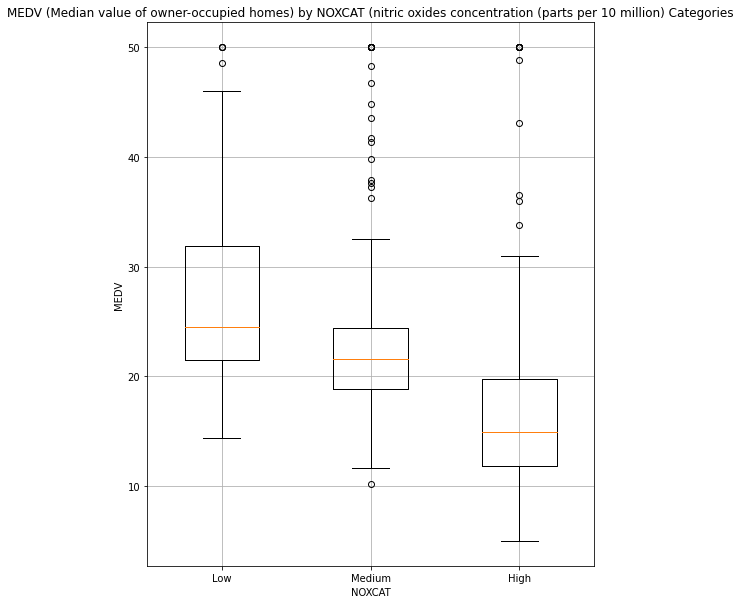

In [8]:
# Add a new categorical column to df_housing called NOXCAT
df_housing['NOXCAT'] = pd.cut(df_housing['NOX'], bins=np.quantile(df_housing['NOX'], [0, .3, .7, 1]), labels=['Low','Medium','High'])

#Create a boxplot that shows MEDV for the different values of NOXCAT (LOW, MEDIUM, HIGH)
plotlabels = ['Low','Medium', 'High']
plotdata = [df_housing[df_housing['NOXCAT']==label]['MEDV'] for label in plotlabels]
plt.figure(figsize=(8, 10))
plt.boxplot(plotdata, widths=0.5, zorder=3, labels=plotlabels) 
plt.xlabel('NOXCAT') # Set x label
plt.ylabel('MEDV') # Set y label
plt.title('MEDV (Median value of owner-occupied homes) by NOXCAT (nitric oxides concentration (parts per 10 million) Categories') 
plt.grid(zorder=2) 
plt.show()

### Exercise 2.3 
The newly created column `NOXCAT` in `df_housing` is a categorical column with three possible values (`LOW`, `MEDIUM`, and `HIGH`). 
- Create a set of dummy variables (for different values of `NOXCAT`).
- Regress `MEDV` on the different `NOX` categories using the dummy variables. Choose the dummy variable coding in your regression such that the intercept reflects the `MEDV` value of suburbs in the `MEDIUM` category. Save the regression result as `res_2` and `print` the regression result to the console.
- Report the regression results from `res_2` in your own words according to APA stype and interpret the coefficients.

Hint: Look at [`pd.get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

In [9]:
#Create a set of dummy variables (for different values of NOXCAT).
df_housing = pd.concat([df_housing, pd.get_dummies(df_housing['NOXCAT'], prefix="dummy")], axis=1)

mod_2 = smf.ols('MEDV ~ dummy_Low + dummy_High', data=df_housing) # Define model
res_2 = mod_2.fit() # Fit using OLS
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     49.85
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           1.77e-20
Time:                        14:52:18   Log-Likelihood:                -1794.5
No. Observations:                 506   AIC:                             3595.
Df Residuals:                     503   BIC:                             3608.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.1910      0.594     39.055      0.0

The regression results show all coefficients have a zero (or very small) p-value = 0.000, confirming they are statistically significant (F-statistic = 49.85). We can interpret that these differences are a real effect and not by chance.

The Intercept or $\hat{\beta}_{0}$, when all the dummy variables (Low and High) are equal to zero,  we interpret as the average MEDV for Medium NOXCAT (= \\$23,191.00). 

$\hat{\beta}_{1}$ = 3.6252, when the dummy_Low is equal to one and the dummy_High is equal to zero  ($\hat{\beta}_{0} + \hat{\beta}_{1}$) we interprete as the average MEDV for Low NOXCAT (\\$23,191.00+\\$3,625.20 = \\$26,816.20). 

$\hat{\beta}_{2}$ = -5.9030, when the dummy_High is equal to one and the dummy_Low is equal to zero ($\hat{\beta}_{0} + \hat{\beta}_{2}$) we interprete as the average MEDV for High NOXCAT (\\$23,191.00-\\$5,903.00 = \\$17,288.00).

## Exercise 3 : Classification

### Exercise 3.1 
- Create a new numerical column called `MEDVBIN` in `df_housing`. The column takes on the value `1` if `MEDV` is greater than the median of `MEDV`. Otherwise, it takes on the value `0`.
- Perform a logistic regression that regresses the newly created column `MEDVBIN` on `CRIM`, `RM`, `NOX`, `DIS` and `AGE` in order to predict the probability that a house has a high `MEDV`. Save the regression results as `res_3` and `print` the results to the console.
- Report the results of the logistic regression `res_3` in APA style, including reporting of AIC, and then interpret the coefficients in your own words. How are this regression and its results different from `res_1` done in Exercise 2.1?

Hint: Use [`statsmodels.formula.api.logit`](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.logit.html) to perform the regression.

In [10]:
#Create a new numerical column called MEDVBIN in df_housing. The column takes on the value 1 if MEDV is greater than the median of MEDV. Otherwise, it takes on the value 0.
df_housing['MEDVBIN'] = [0 if MEDVBIN < df_housing['MEDV'].median() else 1 for MEDVBIN in df_housing['MEDV']]

#Perform a logistic regression
mod_3 = smf.logit('MEDVBIN ~ CRIM + RM + NOX + DIS + AGE', data=df_housing) # Model
res_3 = mod_3.fit() # Fit using MLE
print(res_3.summary()) # Print full summary

print("log-lik.={:.2f}, AIC={:.2f}".format(res_3.llf, res_3.aic))

Optimization terminated successfully.
         Current function value: 0.388677
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                MEDVBIN   No. Observations:                  506
Model:                          Logit   Df Residuals:                      500
Method:                           MLE   Df Model:                            5
Date:                Thu, 17 Mar 2022   Pseudo R-squ.:                  0.4392
Time:                        14:52:23   Log-Likelihood:                -196.67
converged:                       True   LL-Null:                       -350.72
Covariance Type:            nonrobust   LLR p-value:                 1.823e-64
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.8202      2.459     -3.993      0.000     -14.641      -5.000
CRIM          -0.1686      0.

The Logistic regression results show a very small p-value = 0.000 for the variables CRIM (per capita crime rate by town), RM (average number of rooms per dwelling) , DIS (weighted distances to five Boston employment centres) and AGE (proportion of owner-occupied units built prior to 1940), which in this case make sence and indicate that each of these variables are statistically signifincant with the probability of high MEDV, and reject the null hypothesis. The only exception was NOX (nitric oxides concentration (parts per 10 million)) p-value = 0.111 indicating there is no association with the probability of high MEDV. 

$\hat{\beta}_{1}$ = -0.1686 when all the other variables are held constant, a one-unit increase in CRIM (per capita crime rate by town) is associated with a decrease in the log odds of high MEDV by 0.1686 units.

$\hat{\beta}_{2}$ = 2.7750 when all the other variables are held constant, a one-unit increase in RM (average number of rooms per dwelling) is associated with an increase in the log odds of high MEDV by 2.775 units.

$\hat{\beta}_{3}$ = -3.4629 is negative and would decrease the log odds of high MEDV when all the other variables are fixed values, however it is not statistically significant. 

$\hat{\beta}_{4}$ = -0.4725 when all the other variables values are fixed, a one-unit increase in DIS (weighted distances to five Boston employment centres) is associated with a decrease in the log odds of high MEDV by 0.4725  units.

$\hat{\beta}_{5}$ = -0.0488 when all the other variables are held constant, a one-unit increase in AGE (proportion of owner-occupied units built prior to 1940) is associated with a drecrease in the log odds of high MEDV by 0.0488 units. 

The logistic regression results when compared to the previous linear model show a decrease in R^2=0.4392. The association effect of each variable is similar, where CRIM, DIS, and AGE decreases the value of MEDV and RM increases MEDV. However the variable NOX in the linear model is statistically significant.    

### Exercise 3.2 
Continue from the results `res_3` from the previous exercise by considering the first example listed in `df_housing` (index 0).
- Based on the logistic regression model, how likely is it that this house has a `HIGH` `MEDV`? Use the model coefficient estimates and the corresponding values for the first example to calculate its logit and odds. `print` the logits and odds to the console.
- What `MEDVBIN` would be predicted for this first example by the model? Look at the actual `MEDVBIN` of this house and describe in your own words how well the model performed in this case.

Hint: You can access the coefficient estimates using the [`params`](https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.BinaryResults.html) attribute of your fitted model.

In [29]:
# Checking the first house variables(index 0)
df_housing.head(1)

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,NOXCAT,dummy_Low,dummy_Medium,dummy_High,MEDVBIN
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,4.98,24.0,Medium,0,1,0,1


In [28]:
# print the logits and odds to the console
print(np.exp(res_3.params))
print(res_3.predict(df_housing[:1]))

Intercept     0.000054
CRIM          0.844843
RM           16.038789
NOX           0.031338
DIS           0.623421
AGE           0.952343
dtype: float64
0    0.809226
dtype: float64


Based on the logistic regression model this house (index 0) has a probability of around 81% to have a High MEDV. 
The model would have predicted a MEDVBIN = 1, if we assumed that more than 50% means High MEDV. In this case we could say the model performed well as the first house MEDVBIN = 1. However, we are using the same training data to test the model and it can potentially cause an overfitting problem with this model.  

### Exercise 3.3 
We would like to know not only how well the logistic regression model `res_3` did for the first example, but for our entire dataset.
- Use `res_3` to predict the probabilities of `MEDVBIN` being `1`, and save them as a new column `MEDVBIN_PROB` in `df_housing`.
- Generate the actual model predictions as a new column `MEDVBIN_PRED` in `df_housing` by setting them to `1` if the predicted probability `MEDVBIN_PROB` is greater than `0.5`, and to `0` otherwise. 
- Create a confusion matrix `conf_mat` for the results generated by `res_3` to tabulate the predictions `MEDVBIN_PRED` and actual values `MEDVBIN`. `print` `conf_mat` to the console.
- Based on `conf_mat`, calculate sensitivity, specificity, and accuracy. `print` these values to the console as a grammatically correct sentence.
- In you own words, interpret sensitivity, specificity, and accuracy.

Hint: Look at the [`predict`](https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.BinaryResults.html) method of your fitted model for generating the predictions. Also look at [`pd.crosstab`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html).

In [110]:
df_housing['MEDVBIN_PROB'] = res_3.predict(df_housing[['CRIM', 'RM', 'NOX', 'DIS', 'AGE']]) 
df_housing['MEDVBIN_PRED'] = df_housing['MEDVBIN_PROB'].apply(lambda x: np.where(x > 0.5, 1, 0))

conf_mat = pd.crosstab(df_housing['MEDVBIN_PRED'], df_housing['MEDVBIN'], rownames=['Predicted'], colnames=['Actual'], margins=True)
print(conf_mat)

sensitivity = conf_mat.loc[1, 1]/conf_mat.loc['All', 1]
specificity = conf_mat.loc[0, 0]/conf_mat.loc['All', 0]
accuracy = (conf_mat.loc[1, 1]+conf_mat.loc[0, 0])/conf_mat.loc['All','All']
print("Sensitivity={:.2f}%; Specificity={:.2f}%; Accuracy={:.2f}%".format(sensitivity*100, specificity*100,accuracy*100))

Actual       0    1  All
Predicted               
0          215   43  258
1           36  212  248
All        251  255  506
Sensitivity=83.14%; Specificity=85.66%; Accuracy=84.39%


In this case a high Sensitivity is the result of the ratio of positive cases that the classifier correctly identified as positive (212/255 = 81.14%.) 

The Specificity result is also considerable high and represents the ratio of negative cases that the classifier correctly identified as negative. (215/251 = 85.66%.)

The model Accuracy is the total number of predictions that were correct classified. In this case, (215+212)/506 = 84.39%